# Open CV & Cascade

In [ ]:
# Importar a OpenCV
import cv2

In [ ]:
# Carrega a imagem para processar
img = cv2.imread("/content/lenna.png")

In [ ]:
# Tipo da imagem carregada
type(img)

numpy.ndarray

In [ ]:
# Dimensões da imagem
img.shape

(512, 512, 3)

In [ ]:
# Converter a img para escala de cinza
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [ ]:
img_gray.shape

(512, 512)

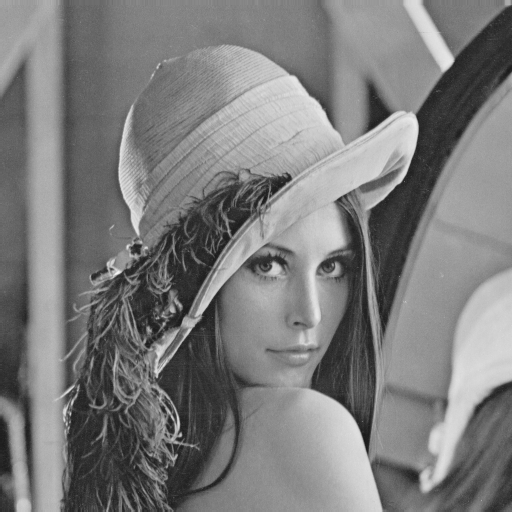

In [ ]:
# Exibir as imagens processadas
#cv2.imshow('titulo', imagem) # Não funciona dentro do Colab

# Para exibir imagens no Colab
from google.colab.patches import cv2_imshow
cv2_imshow(img_gray)

In [ ]:
pixel_0_0 = img_gray[0,0]
# 0 (preto) - 255 (branco)
pixel_0_0

162

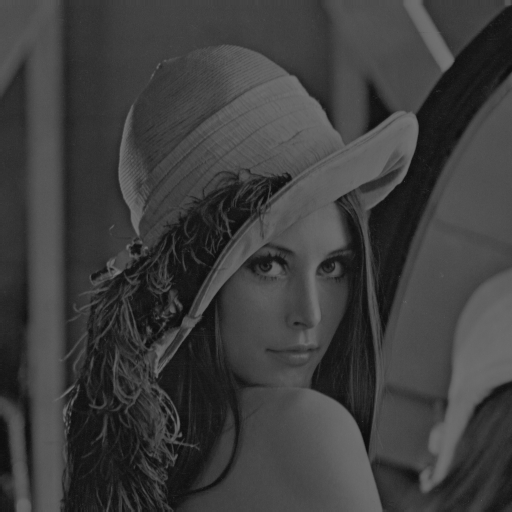

In [ ]:
# Escurecendo a imagem
# Reduz pela metade a intencidade de cada pixel
nova_img = img_gray.copy()
for linha in range(len(img_gray)):
  for coluna in range(len(img_gray[linha])):
    nova_img[coluna, linha] = img_gray[coluna, linha] // 2
cv2_imshow(nova_img)

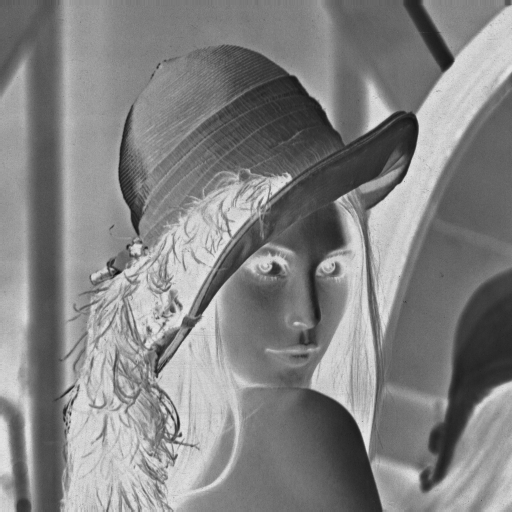

In [ ]:
# Invertendo as cores da imagem
nova_img = img_gray.copy()
for linha in range(len(img_gray)):
  for coluna in range(len(img_gray[linha])):
    nova_img[coluna, linha] = 255 - img_gray[coluna, linha]
cv2_imshow(nova_img)

In [ ]:
# Utilizando o Matplotlib para plotar as imagens
import matplotlib.pyplot as plt
# Por estarmos utilizando um notebook
%matplotlib inline

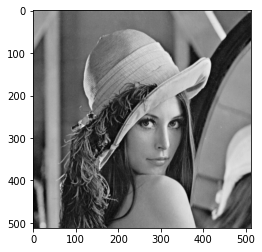

In [ ]:
# Imprime uma imagem
plt.imshow(img_gray, cmap='gray')

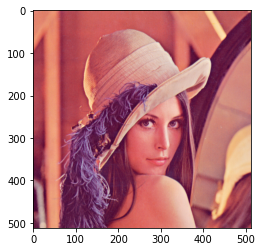

In [ ]:
# Imagem colorida
img_color = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_color)

In [ ]:
# Carrega o classificador Cascade
classificador = cv2.CascadeClassifier('/content/haarcascade_frontalface_default.xml')

In [ ]:
# Roda o classificador para detectar faces nas imagens
faces = classificador.detectMultiScale(img_gray, scaleFactor = 1.1, minNeighbors = 3)

In [ ]:
faces

array([[217, 201, 173, 173]], dtype=int32)

In [ ]:
# Coloca um retângulo em volta da imagem
def coloca_retangulo(img, faces):
  img_saida = img.copy()
  for face in faces:
    pos_x, pos_y, largura, altura = face
    cv2.rectangle(img_saida, (pos_x, pos_y), (pos_x + largura, pos_y + altura), 
                  color=(50,200,20), thickness=3)
  return img_saida

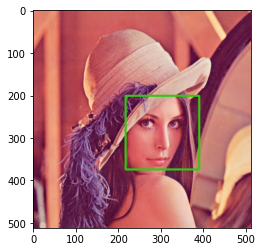

In [ ]:
plt.imshow(coloca_retangulo(img_color, faces))

In [ ]:
#Cria um conjunto de operacoes para extrair as faces das imagems
def faz_tudo_e_quadrado(caminho_imagem):
  img = cv2.imread(caminho_imagem)
  img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  img_color = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  faces = classificador.detectMultiScale(img_gray, scaleFactor = 1.1, minNeighbors=3)
  return coloca_retangulo(img_color, faces)

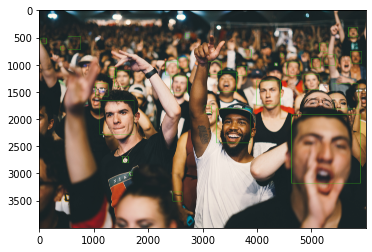

In [ ]:
plt.imshow(faz_tudo_e_quadrado("/content/crowd.jpg"))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Traz o OpenCV para utilizarmos
import cv2

In [ ]:
# Define os paths para as imagens de treino e de teste
path_treino = '/content/drive/MyDrive/Maua/imagens/treino'
path_teste = '/content/drive/MyDrive/Maua/imagens/teste'

In [ ]:
# Cria 4 listas para guardar as imagens e os labels de cada conjunto
nome_imagens_treino = []
nome_imagens_teste = []
label_imagens_treino = []
label_imagens_teste = []

In [ ]:
# Passa por todos os arquivos que estão do diretório de treino
from os import walk
for (dirpath, dirname, filename) in walk(path_treino):
  for arquivo in filename:
    if '.jpg' in arquivo:
      nome_imagens_treino.append(arquivo)
      label_imagens_treino.append(arquivo[1:arquivo.find('_')])

In [ ]:
# Passa por todos os arquivos que estão do diretório de teste
from os import walk
for (dirpath, dirname, filename) in walk(path_teste):
  for arquivo in filename:
    if '.jpg' in arquivo:
      nome_imagens_teste.append(arquivo)
      label_imagens_teste.append(arquivo[1:arquivo.find('_')])

In [ ]:
label_imagens_treino[0]

'33'

In [ ]:
len(nome_imagens_teste)

250

In [ ]:
# Carrega as imagens para dentro do colab
imagens_treino = []
for amostra in nome_imagens_treino:
    imagens_treino.append(cv2.resize(cv2.imread(f'{path_treino}/{amostra}', cv2.IMREAD_GRAYSCALE), (200,200)))

In [ ]:
import numpy as np
label_imagens_treino = np.asarray(label_imagens_treino, dtype=np.int32)

In [ ]:
# Cria um modelo de Eigen Faces
modelo_eigen = cv2.face.EigenFaceRecognizer_create()

In [ ]:
# Treina o modelo criado
modelo_eigen.train(imagens_treino, label_imagens_treino)

In [ ]:
# Com o modelo treinado
resultado = modelo_eigen.predict(imagens_treino[151])
resultado

(35, 0.0)

In [ ]:
nome_imagens_treino[151]

's35_02.jpg'

In [ ]:
resultado = modelo_eigen.predict(cv2.resize(cv2.imread(f'{path_teste}/{nome_imagens_teste[25]}', cv2.IMREAD_GRAYSCALE), (200,200)))
resultado

(10, 5242.7346502116625)

In [ ]:
nome_imagens_teste[25]

's10_15.jpg'